In [1]:
%matplotlib inline
save_directory = '../../../thesis/kid/'
save = True

In [2]:
from scipy.constants import h, k as k_B, pi
from scipy.special import i0, k0

In [3]:
# Physical quantities related to energy
BCS = 1.76
T_c = 1.3
Delta_Al = BCS * k_B * T_c
f_mc = 2.5e9
f_1p = 100e6

In [4]:
h * f_mc / Delta_Al

0.0524392991937429

In [5]:
h * f_1p / Delta_Al

0.0020975719677497158

In [6]:
def dos(energy, Delta, Delta2=0, Gamma=0):
    E = energy - 1j * Gamma
    D = Delta - 1j * Delta2
    return np.real(E * (E**2 - D**2)**(-1/2))

# The 'reversed' density of states that enters K_sigma_2
def dos_r(energy, Delta, Delta2=0, Gamma=0):
    E = energy - 1j * Gamma
    D = Delta - 1j * Delta2
    return np.real(E * (D**2 - E**2)**(-1/2))
    
def K_sigma_1(energy, Delta, hf, sigma_n, Delta2=0, Gamma=0):
    rho = dos(energy=energy, Delta=Delta, Delta2=Delta2, Gamma=Gamma)
    rho_plus = dos(energy=energy + hf, Delta=Delta, Delta2=Delta2, Gamma=Gamma)
    rho_minus = dos(energy=energy - hf, Delta=Delta, Delta2=Delta2, Gamma=Gamma)
    c_plus = 1 + Delta**2 / (energy * (energy + hf))
    c_minus = 1 + Delta**2 / ((energy - hf) * energy)
    return (2 * sigma_n / hf) * rho * (c_plus * rho_plus - c_minus * rho_minus)

def K_sigma_2(energy, Delta, hf, sigma_n, Delta2=0, Gamma=0):
    rho = dos(energy=energy, Delta=Delta, Delta2=Delta2, Gamma=Gamma)
    rho_r = dos_r(energy=energy - hf, Delta=Delta, Delta2=Delta2, Gamma=Gamma)
    c_minus = 1 + Delta**2 / ((energy - hf) * energy)
    return (-2 * sigma_n / hf) * rho * (pi * Delta / energy + c_minus * rho_r)

def rK_sigma_1(energy, Delta, hf, sigma_n, Delta2=0, Gamma=0):
    rho = dos(energy=energy, Delta=Delta, Delta2=Delta2, Gamma=Gamma)
    rho_plus = dos(energy=energy + hf, Delta=Delta, Delta2=Delta2, Gamma=Gamma)
    rho_minus = dos(energy=energy - hf, Delta=Delta, Delta2=Delta2, Gamma=Gamma)
    c_plus = 1 + Delta**2 / (energy * (energy + hf))
    c_minus = 1 + Delta**2 / ((energy - hf) * energy)
    return (2 * sigma_n / hf) * (c_plus * rho_plus - c_minus * rho_minus)

def rK_sigma_2(energy, Delta, sigma_n, Delta2=0, Gamma=0):
    rho = dos(energy=energy, Delta=Delta, Delta2=Delta2, Gamma=Gamma)
    rho_r = dos_r(energy=energy - hf, Delta=Delta, Delta2=Delta2, Gamma=Gamma)
    c_minus = 1 + Delta**2 / ((energy - hf) * energy)
    return (-2 * sigma_n / hf) * (pi * Delta / energy + c_minus * rho_r)

def fermi_dirac(energy, temperature):
    return 1 / (np.exp(energy / (k_B * temperature)) + 1)

In [7]:
sigma_n = 1

Delta = Delta_Al
#hf = Delta * h * f_mc / Delta_Al
hf = Delta * h * f_1p / Delta_Al
energy = Delta * np.linspace(1 - 1 * hf / Delta, 1 + 3 * hf / Delta, 10000)
Delta2 = Delta * 0.0001
Gamma = 0

K1 = (Delta / sigma_n) * K_sigma_1(energy=energy, Delta=Delta, hf=hf, sigma_n=sigma_n, Delta2=Delta2, Gamma=Gamma)
K2 = (Delta / sigma_n) * K_sigma_2(energy=energy, Delta=Delta, hf=hf, sigma_n=sigma_n, Delta2=Delta2, Gamma=Gamma)

(0.99790242803225015, 1.0062927159032491)

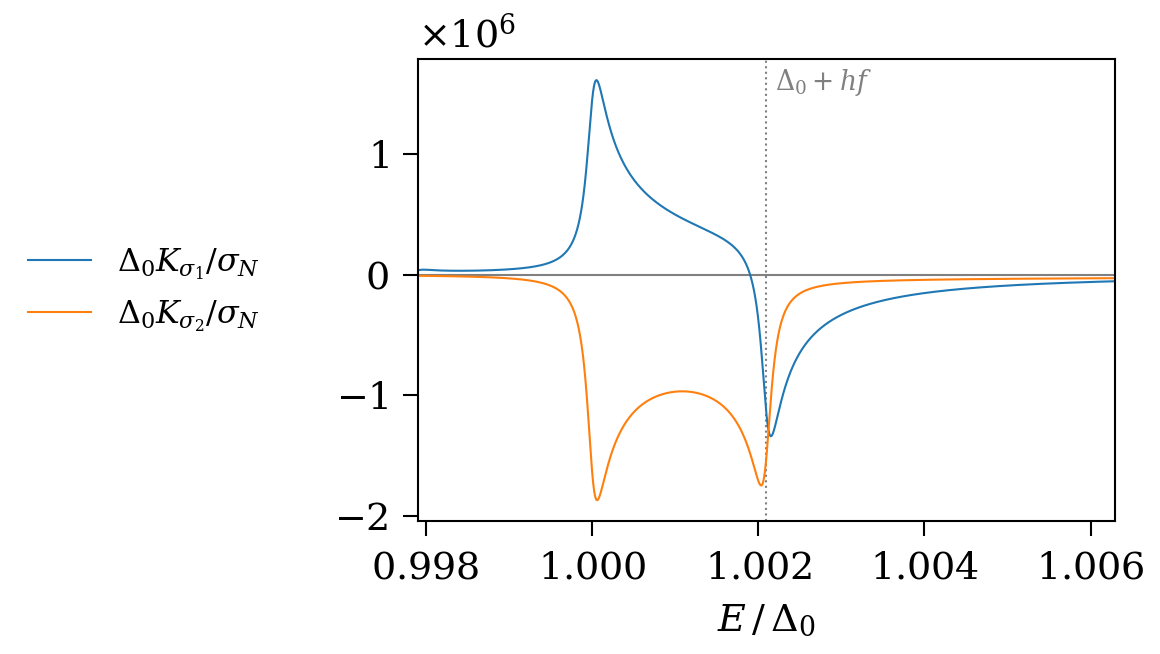

In [8]:
fig, ax = plt.subplots()
ax.axhline(0, color='gray')
ax.text(1 + 1.05 * hf / Delta, 0.95 * K1.max(), r'$\Delta_0 + hf$', fontsize='xx-small', color='gray')

ax.axvline(1 + hf / Delta, color='gray', linestyle=':')
ax.plot(energy / Delta,
        K1,
        label=r'$\Delta_0 K_{\sigma_1} / \sigma_N$')
ax.plot(energy / Delta,
        K2,
        label=r'$\Delta_0 K_{\sigma_2} / \sigma_N$')
ax.set_xlabel(r'$E \, / \, \Delta_0$')
ax.legend(loc='center left', bbox_to_anchor=(-0.6, 0.5), fontsize='x-small')
ax.set_xlim(energy.min() / Delta, energy.max() / Delta)

#if save:
#    fig.savefig(save_directory + 'responseqpoccupancy_conductivity_f_mc.pdf')

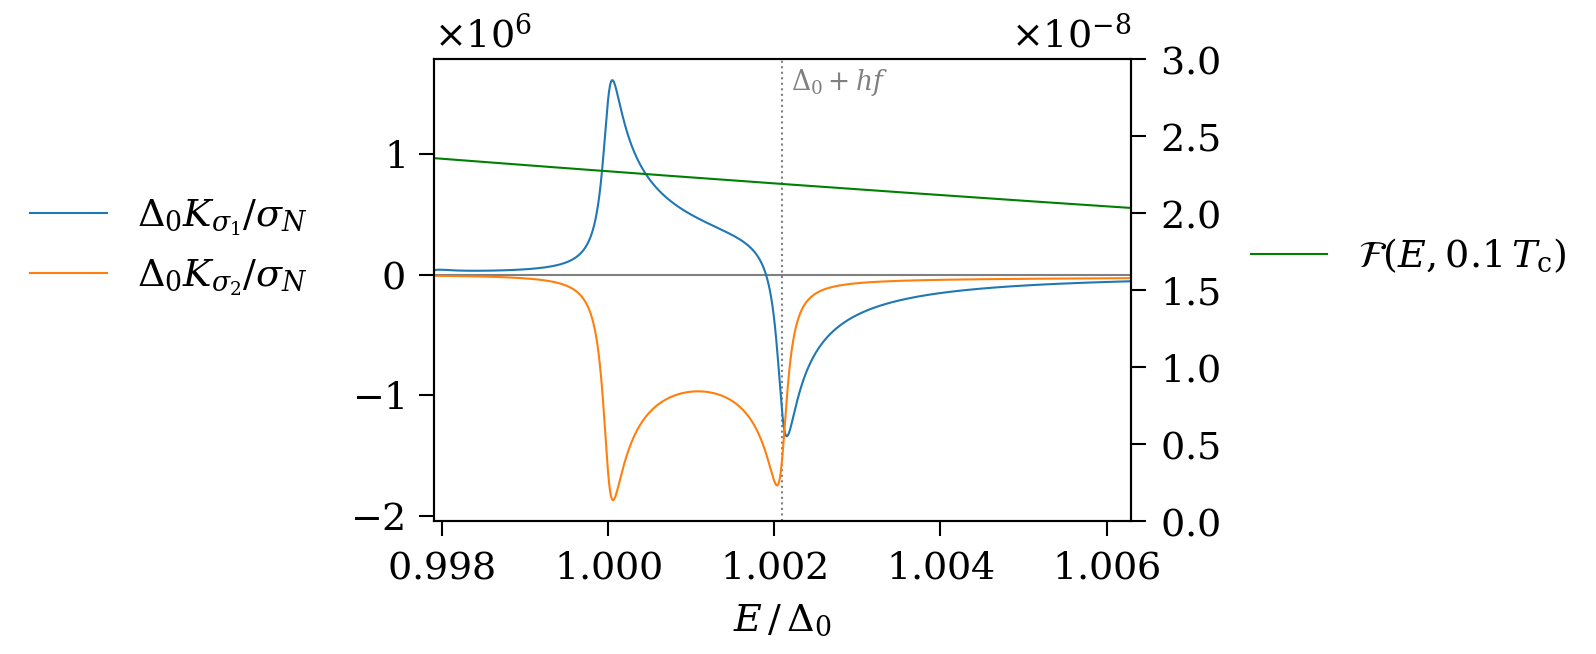

In [9]:
fig, K_ax = plt.subplots()
F_ax = K_ax.twinx()

K_ax.axhline(0, color='gray')
K_ax.text(1 + 1.05 * hf / Delta, 0.95 * K1.max(), r'$\Delta_0 + hf$', fontsize='xx-small', color='gray')

K_ax.axvline(1 + hf / Delta, color='gray', linestyle=':')
K_ax.plot(energy / Delta,
          K1,
          label=r'$\Delta_0 K_{\sigma_1} / \sigma_N$')
K_ax.plot(energy / Delta,
          K2,
          label=r'$\Delta_0 K_{\sigma_2} / \sigma_N$')
K_ax.set_xlabel(r'$E \, / \, \Delta_0$')
K_ax.legend(fontsize='small', loc=(-0.6, 0.45))#bbox_to_anchor=(-0.6, 0.3, -0.4, 0.7), bbox_transform=ax.transAxes)
K_ax.set_xlim(energy.min() / Delta, energy.max() / Delta)

F_ax.plot(energy / Delta,
          fermi_dirac(energy=energy, temperature=0.1 * T_c),
          label='$\mathcal{F}(E, 0.1 \, T_\mathrm{c}$)', color='green')
F_ax.legend(fontsize='small', loc=(1.15, 0.5))
F_ax.set_ylim(0, 3e-8)

if save:
    fig.savefig(save_directory + 'responseqpoccupancy_conductivity_f_1p.pdf')

To Do: redefine variables below to match above, and re-run.

In [10]:
raise Exception()

Exception: 

In [ ]:
# Normalize to the normal conductivity
sigma_n = 1

# Define energies in units of the gap 
Delta_K = 1
energy = Delta_K * np.linspace(0.97, 1.2, 10000)
hf = Delta_K * E_mc / Delta_Al
Delta2 = Delta_K * 0.0005
Gamma = Delta_K * 0

rho = dos(energy=energy, Delta=Delta_K, Delta2=Delta2, Gamma=Gamma)
rho_color = 'green'

fig, kappa_ax = plt.subplots()
dos_ax = kappa_ax.twinx()
kappa_ax.axhline(0, color='gray')
kappa_ax.axvline(Delta_K + hf, color='gray', linestyle=':')
dos_ax.text(Delta_K + 1.05 * hf, 0.95 * rho.max(), r'$\Delta_0 + hf$', fontsize='xx-small', color='gray')
kappa_ax.plot(energy,
              kappa_sigma_1(energy=energy, Delta=Delta_K, Delta2=Delta2, Gamma=Gamma),
              label=r'$\frac{K_{\sigma_1}}{\rho_0 \sigma_N}$')
kappa_ax.plot(energy,
              kappa_sigma_2(energy=energy, Delta=Delta_K, Delta2=Delta2, Gamma=Gamma),
              label=r'$\frac{K_{\sigma_2}}{\rho_0 \sigma_N}$')
dos_ax.plot(energy,
            rho,
            label=r'$\rho_0$', color=rho_color)
kappa_ax.set_xlabel(r'$E \, / \, \Delta_0$')
#kappa_ax.set_ylabel('reduced\nresponse\nfunction', rotation='horizontal', labelpad=12)
dos_ax.set_ylabel(r'$\rho_0$', color=rho_color, rotation='horizontal', labelpad=12)
kappa_ax.legend(loc='center left', bbox_to_anchor=(-0.6, 0.5))#, fontsize='x-small')
#dos_ax.legend(fontsize='xx-small')
kappa_ax.set_xlim(energy.min(), energy.max());

In [ ]:
((2 * Delta_Al) / (pi * E_bath))**(1/2)

In [ ]:
E_low / (2 * E_bath)

In [ ]:
E_mc / (2 * E_bath)

In [ ]:
np.exp(-E_low / (2 * E_bath)) * i0(E_low / (2 * E_bath))

In [ ]:
np.exp(-E_mc / (2 * E_bath)) * i0(E_mc / (2 * E_bath))

# Approximations in the integrals

In [ ]:
def denominator(z, D):
    return (2 * D * (z - 1) + (z - 1)**2)**(1/2) * (2 * D * (z + 1) + (z + 1)**2)**(1/2)

In [ ]:
z = np.linspace(1.0001, 2, 10000)
D_low = 2 * Delta_Al / E_low
D_mc = 2 * Delta_Al / E_mc
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(z, 2 * D_mc**2 / denominator(z, D_mc), label='$2 D^2$')
ax.plot(z, 2 * D_mc * z / denominator(z, D_mc), label='$2 D z$')
ax.plot(z, z**2 / denominator(z, D_mc), label='$z^2$')
ax.legend(fontsize='x-small');

# Relative size of terms in $K_{\sigma_2}$

In [ ]:
k0(Delta_Al / E_bath)

In [ ]:
np.exp(-Delta_Al / E_bath) * np.exp(-E_low / (2 * E_bath)) * i0(E_low / (2 * E_bath))

In [ ]:
np.exp(-Delta_Al / E_bath) * np.exp(-E_mc / (2 * E_bath)) * i0(E_mc / (2 * E_bath))